## 01. Importing the Libraries 

In [1]:
# Data Analysis Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Processing 
from sklearn.preprocessing import StandardScaler, Normalizer,RobustScaler,PolynomialFeatures
from sklearn.preprocessing import SplineTransformer,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


## Libraries for modelling 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error


# Other utilities
import warnings
warnings.filterwarnings(action='ignore')

## 02. Importing and Getting to Know the Data

In [2]:
# Importing the data 
from sklearn.datasets import  fetch_california_housing
housing = fetch_california_housing()

In [3]:
# print(housing.DESCR)
df = pd.DataFrame(housing.data,columns=housing.feature_names)
df['price'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## 03. EDA


### 3.1 Explore the Missingness in the data 

In [4]:
df.info()
# no missingness in the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### 3.2 Explore The Distribution in the Data 

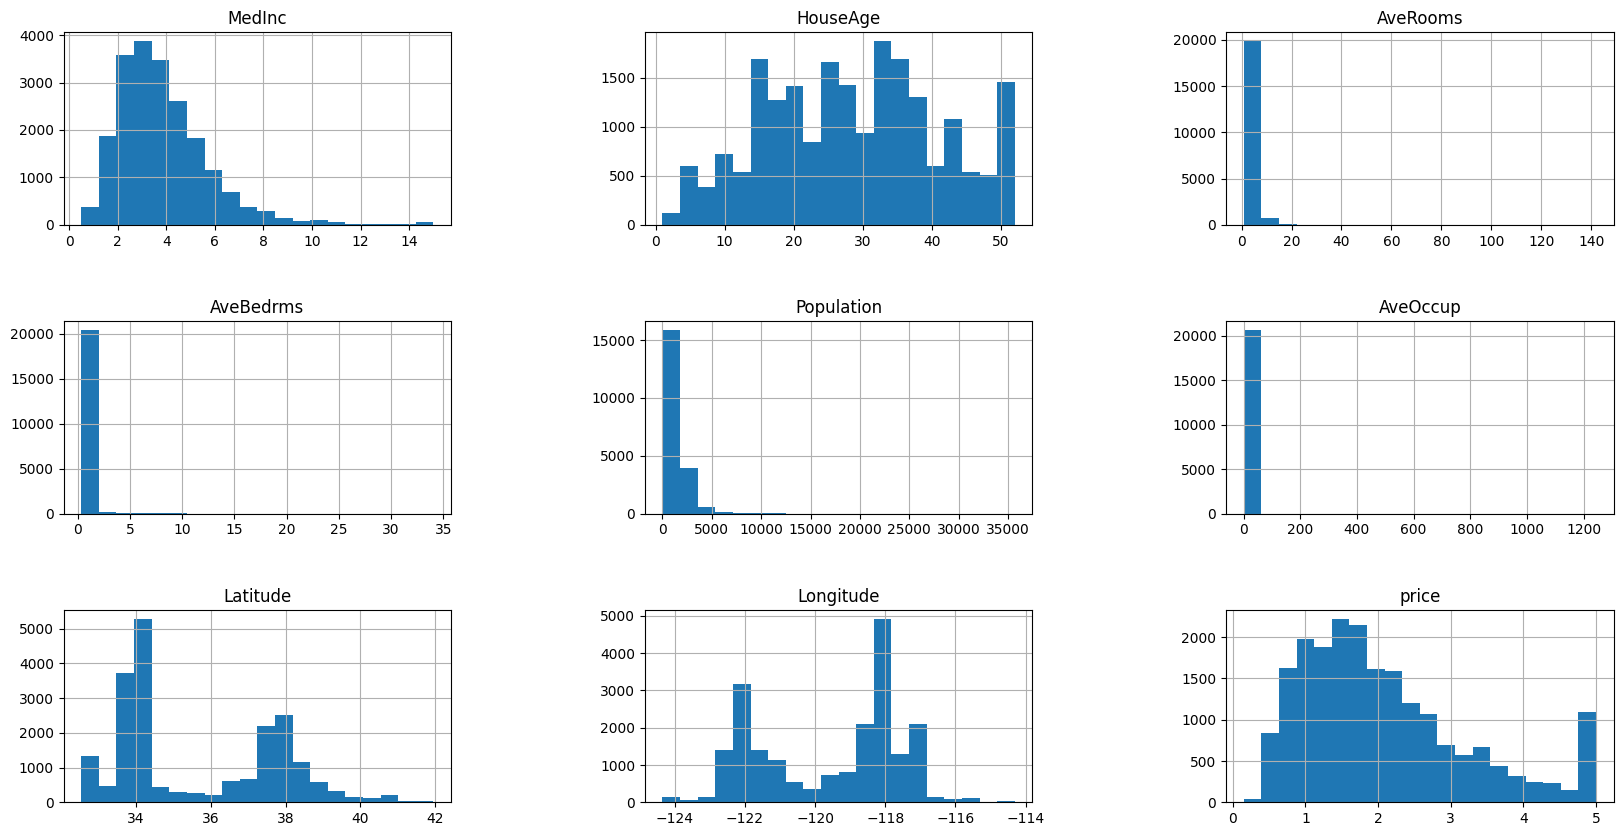

In [5]:
## distribution of the data 
df.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

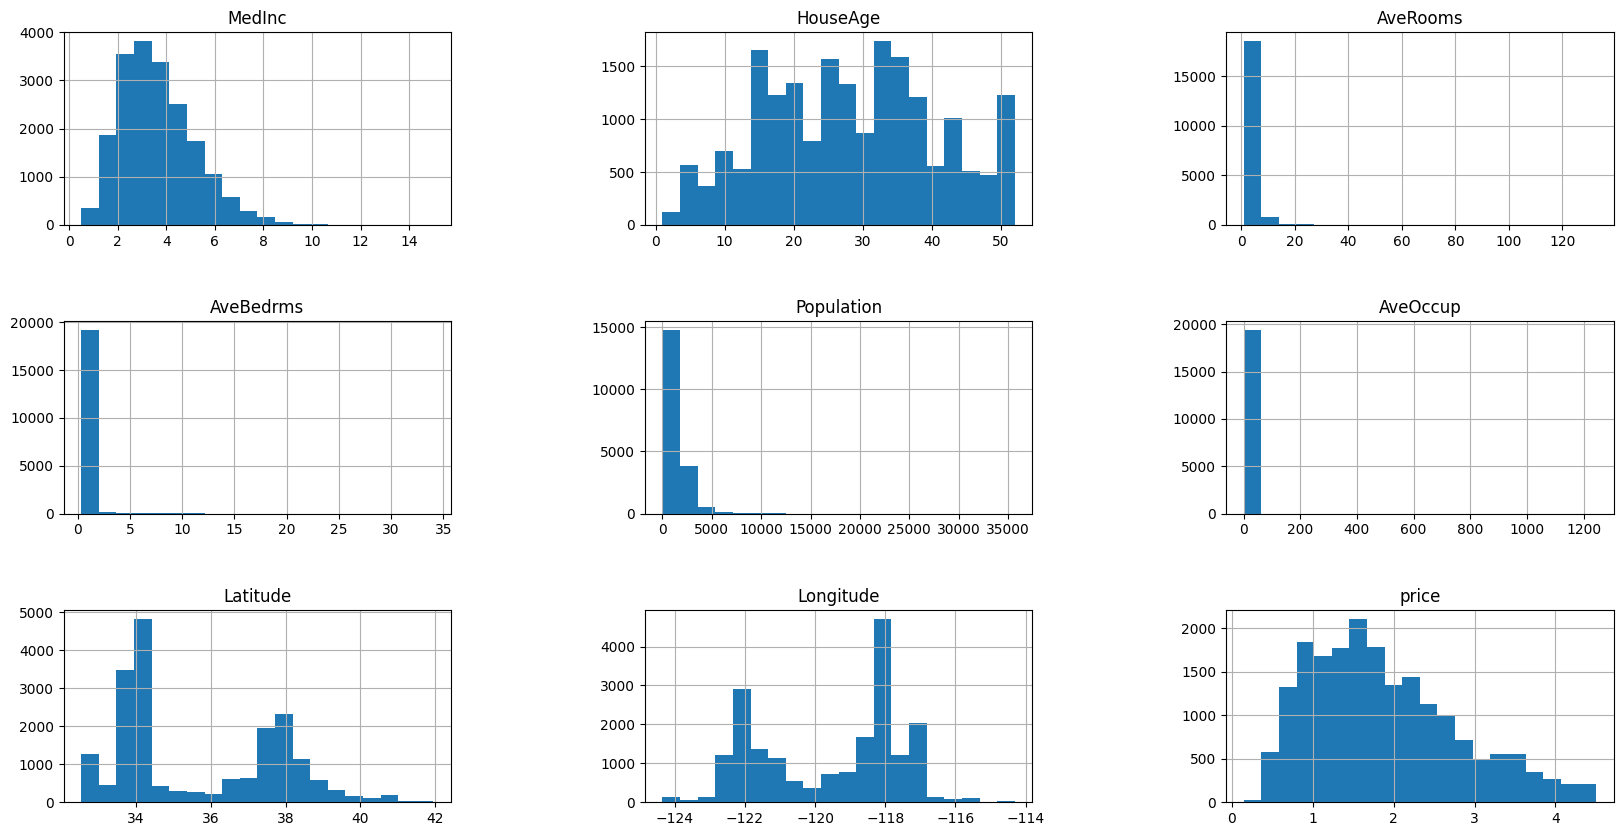

In [6]:
# delete all rows with price = 5
df = df[df['price'] <=4.5]
## distribution of the data 
df.hist(figsize=(20,10),bins=20)
plt.subplots_adjust(hspace=0.5,wspace=0.5)

### Insights 
- Median Income - Normnal Distribution 
- House Age - Uniform Distribution 
- AVG Rooms, Avg Bedroomms , Avg Occupants and Pop have a very large range and the data has unnoticable bins for the largest values (these can be considered as outliers)- subject to further testing. 

### 3.3 Explore Outliers 

![outliers](https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png)

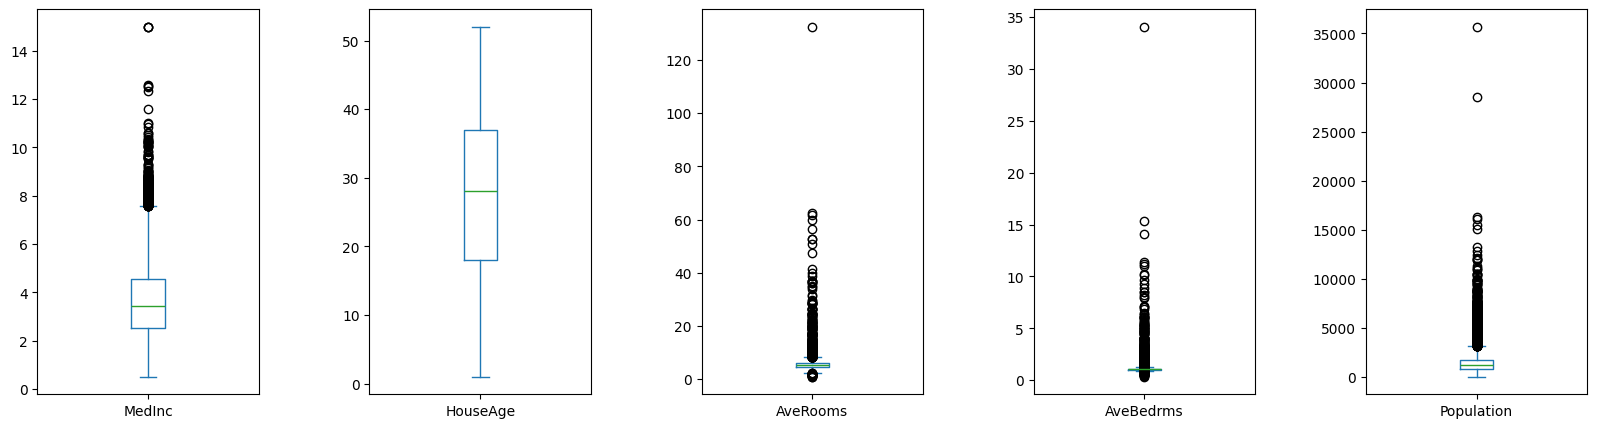

In [7]:
### Exploring outliers using box plots. 
cols=list (df.columns[:5])

# df[cols].boxplot()
## Create a fig and subplots 
# fig,axes = plt.subplots(ncols = len(cols))
# for i,j in zip(cols,axes):
#     sns.boxplot(df[i],ax=j)
#     j.set_title(i)

# plt.tight_layout()
# plt.subplots_adjust(wspace=0.1) 

# Use pandas plot() with parameters kind='box' and subplots=True like below. The parameter sharey is set to False by default. 
# It works along with sbuplots=True to isolate the y-axis for each column.

df[cols].plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(20,5)
)
plt.subplots_adjust(wspace=0.5) 

In [8]:
## Exloring outliers in an alternative way
df[cols].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population
count,19383.000000,19383.000000,19383.000000,19383.000000,19383.000000
mean,3.640150,28.322086,5.349386,1.097105,1443.646133
std,1.529523,12.490368,2.300157,0.454899,1144.939396
min,0.499900,1.000000,0.846154,0.333333,3.000000
25%,2.516500,18.000000,4.409840,1.005888,798.000000
50%,3.421900,28.000000,5.175637,1.048689,1182.000000
75%,4.542750,37.000000,5.954115,1.099570,1750.000000
max,15.000100,52.000000,132.533333,34.066667,35682.000000


### Insights 
- Looking at the box plots and the difference between the max and the 75% values, we can see a huge difference for the numerical variables except for House Age. 
- This confirms our intuition of the existence of the extreme values. 

Text(0.5, 1.0, 'Median Price of a house depending on the spartial location')

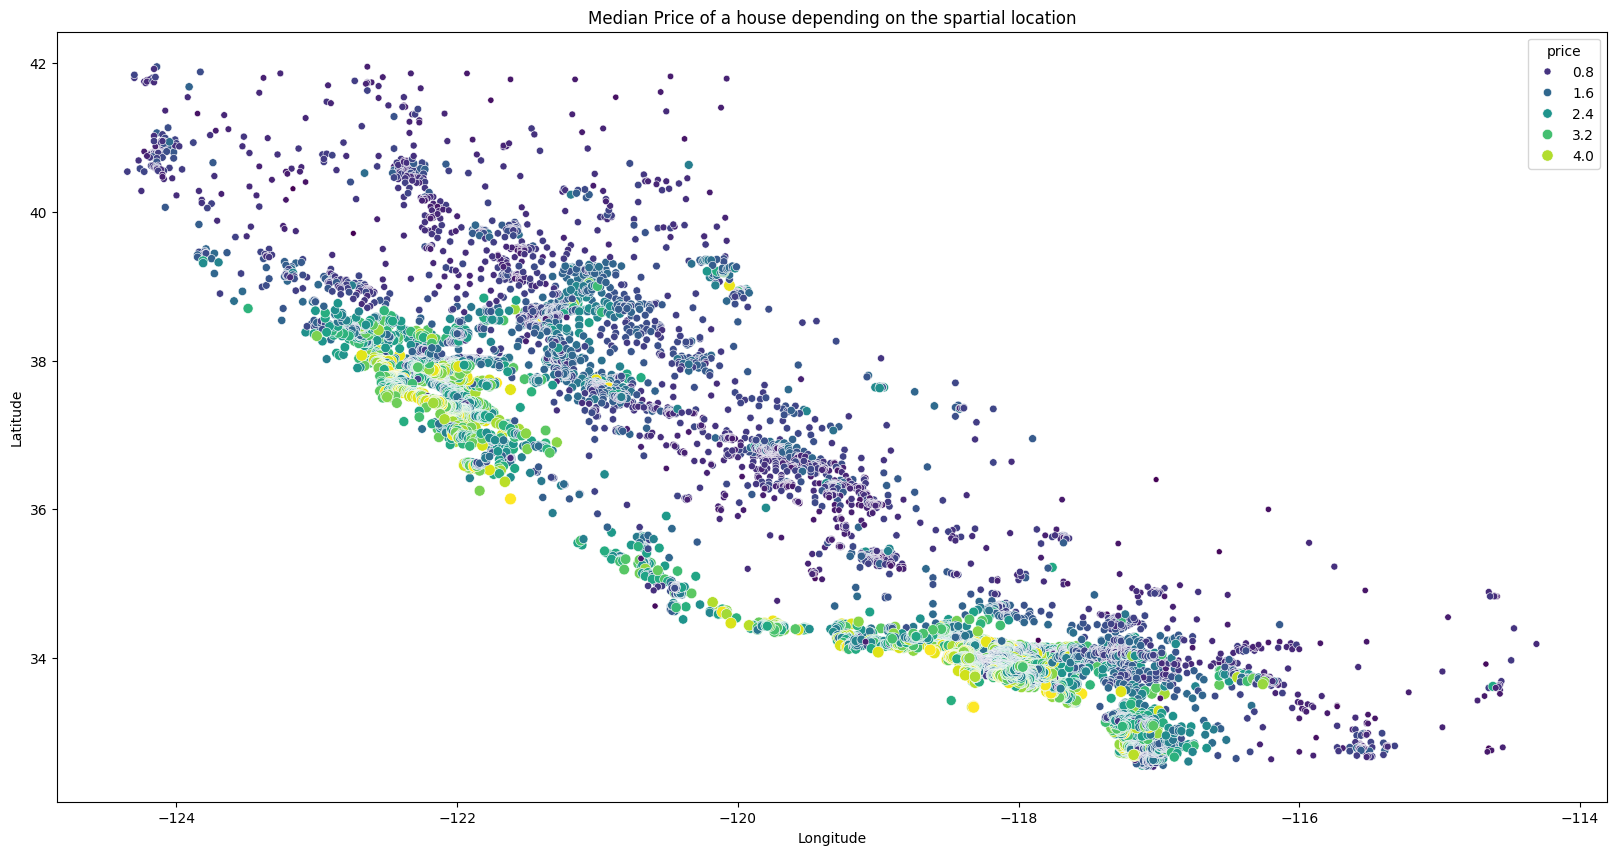

In [9]:
### Exploring latitude and Longitude 
plt.figure( figsize=(20,10))
sns.scatterplot(
    data = df,
    x = 'Longitude',
    y = 'Latitude',
    size = 'price',
    hue = 'price',
    palette ='viridis',
   
)
plt.title('Median Price of a house depending on the spartial location')

## Insights 
- Houses closer to the coast are more pricey than those on shore. This indicates that location data adds to the variability in pricing, hence we should incorporate it in our model. 

## 04. Data prep-processing 

In [10]:
# # Scale the data 
# scaler = StandardScaler()
# X = scaler.fit_transform(df.drop(['price'],axis=1))
X=df.drop(['price'],axis=1)
X = pd.DataFrame(X,columns=df.drop(['price'],axis=1).columns)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25


## 05. Modelling - Linear Regression

In [71]:
## Split the Data in Training and Testing Categorite - Train Test Split 
y = df.price
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=57,test_size=.3)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

## Define Linear Reg Model 
reg_model= LinearRegression()
reg_model.fit(x_train,y_train)

y_pred = reg_model.predict(x_test)
print(("-")*50)
print("R2 Score",r2_score(y_pred,y_test))
## Metric - the variability in the y variable that is explained by the model - the higher the better. The closer to 1 the better 100%
print("MSE",(mean_squared_error(y_pred,y_test)))
print("RMSE",math.sqrt(mean_squared_error(y_pred,y_test)))

(13568, 8) (13568,) (5815, 8) (5815,)
--------------------------------------------------
R2 Score 0.22154510560486362
MSE 0.37412845498802483
RMSE 0.611660408223407


In [12]:
## we can also get the model coefficients
print("Model Coefficients ", reg_model.coef_)
print("The y_intercept ",reg_model.intercept_)

Model Coefficients  [ 4.19017040e-01  7.20759417e-03 -1.09225003e-01  6.46456644e-01
  4.84552469e-06 -5.17389556e-03 -3.67961305e-01 -3.85672172e-01]
The y_intercept  -32.953039088695824


### Model Selection

In [13]:
## Cross validated Modelling 
scores = cross_val_score(LinearRegression(),
                        x_train,y_train,
                        cv=5,
                        scoring='r2')
                        
print(scores,scores.mean())

[0.57219782 0.55898093 0.51796348 0.57989774 0.58430352] 0.5626686974884647


In [35]:
## Linear Regression with Polynomial Transformer using MSE As a measurement 
pipe = make_pipeline(StandardScaler(),
                    Normalizer(),
                    PolynomialFeatures(degree=4,interaction_only=False),
                    LinearRegression())
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
print(scores,scores.mean()*-1)

[-0.24529213 -0.27154644 -0.24896881 -0.27280585 -0.26607353] 0.26093735030389015


In [39]:
## Linear Regression with Polynomial Transformer now using r2 score 
pipe = make_pipeline(StandardScaler(),
                    Normalizer(),
                    PolynomialFeatures(degree=3,interaction_only=False),
                    LinearRegression())
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.70872016 0.68430721 0.70164275 0.68936564 0.69244233] 0.695295620046274


In [44]:
## Linear Regression with Spline Transformer
pipe = make_pipeline(Normalizer(),
                    SplineTransformer(degree=1, n_knots=6),
                    LinearRegression())
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.20536997 0.32527724 0.38138702 0.35048871 0.33060559] 0.3186257053436105


## 06. Modelling - Regularized Regression 

In [ ]:
## Ridge
pipe = make_pipeline(Normalizer(),
                    PolynomialFeatures(degree=4,interaction_only=False),
                    Ridge(alpha=0.00001))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[-0.0235164   0.43931994 -0.09981763  0.49701162  0.5027887 ] 0.2631572446844528


In [77]:
## Lasso

## A small alpha in Lasso, will not penalize the coefficients that much, making it almost similar to a Ridge Regression model 
pipe = make_pipeline(StandardScaler(),Normalizer(),
                    SplineTransformer(degree=3, n_knots=6),
                    Lasso(alpha=1e-3))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.63959633 0.63445125 0.65046285 0.6311134  0.64070544] 0.6392658553895421


In [80]:
## Lasso

## A small alpha in Lasso, will not penalize the coefficients that much, making it almost similar to a Ridge Regression model 
pipe = make_pipeline(StandardScaler(),Normalizer(),
                    PolynomialFeatures(degree=3),
                    Lasso(alpha=1e-3))
scores = cross_val_score(pipe,x_train,y_train,cv=5,scoring='r2')
print(scores,scores.mean())

[0.64820504 0.64534658 0.67088331 0.64373428 0.65683542] 0.6530009268486451


<Axes: >

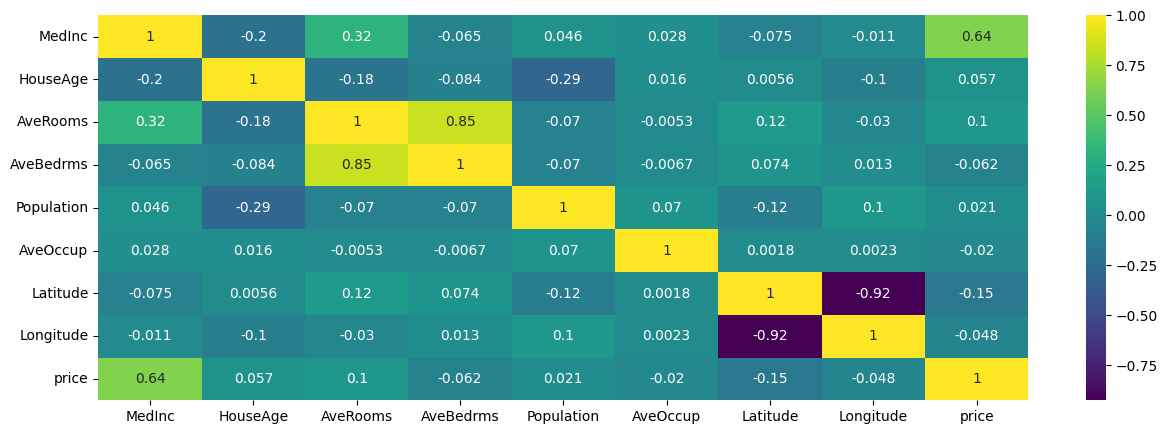

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

Why is lasso worse off that ridge 
- Lasso - When you have a lot of useless variables that you want to discard 
- Ridge - When you have a lot of useful variables but you want to minimize the effect they have on the predictions

# 0.7 Using a fucntion transformer 

In [72]:
## We will try a bunch of functions 
# func_trans = FunctionTransformer(func=np.log1p) # np.log1p  Handles log(1 + x) to avoid log(0)
func_trans = FunctionTransformer(np.exp) # Exponential transformation: Common for certain non-linear relationships.
func_trans = FunctionTransformer(np.acos) 

pipe = make_pipeline(StandardScaler(),
                    Normalizer(),
                    func_trans,
                    LinearRegression())
scores = cross_val_score(pipe,
                         x_train,
                         y_train,cv=5,
                         scoring='r2')

print(scores,scores.mean())

[0.59734263 0.57369597 0.59993493 0.58360864 0.59001082] 0.5889185972631982


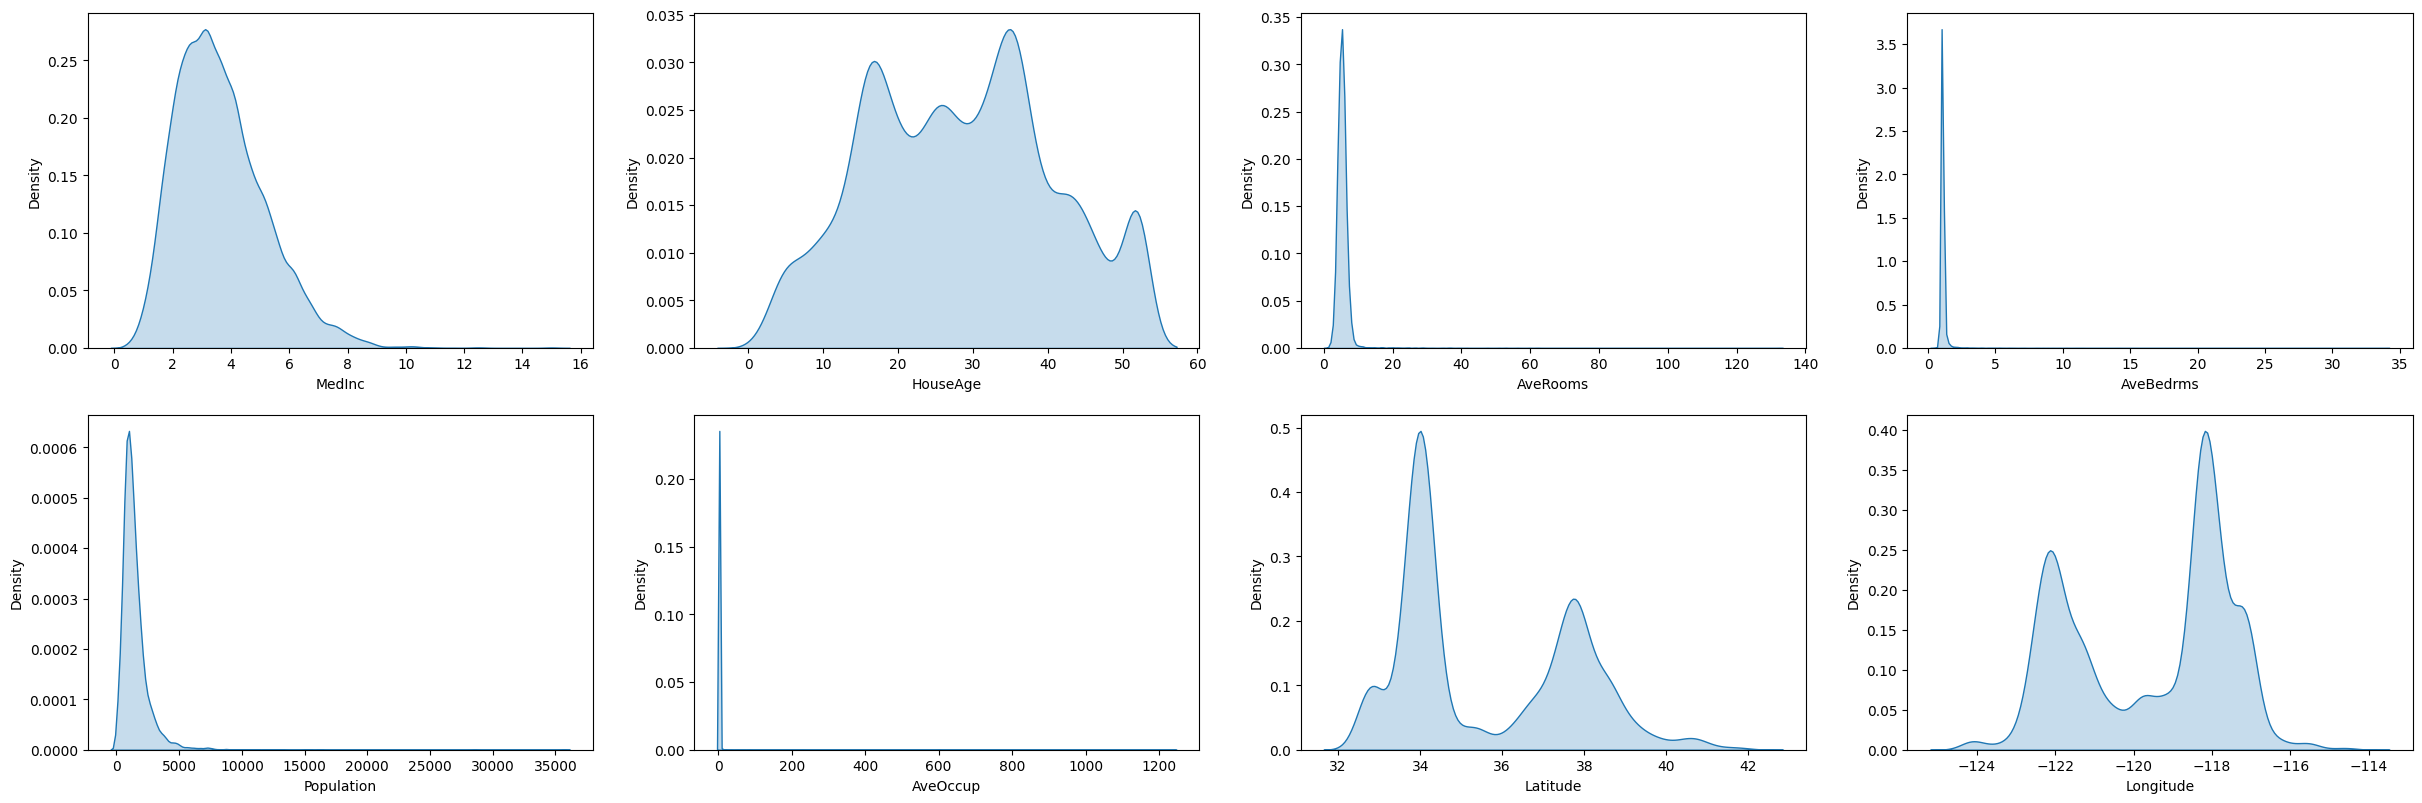

In [22]:
fig = plt.figure(figsize=(30,20))
for i in range(len(X.columns)):
    ax = fig.add_subplot(4,4, i+1)
    sns.kdeplot(X[X.columns[i]], shade=True)

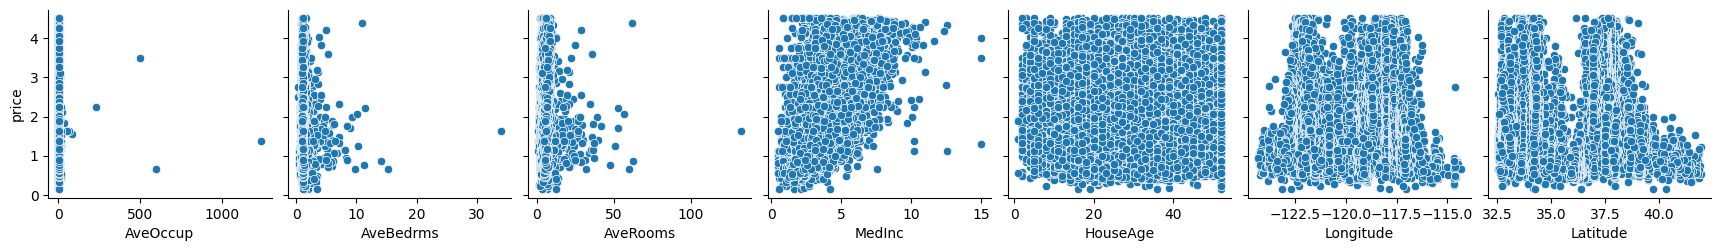

In [23]:
sns.pairplot(df,
    x_vars=['AveOccup','AveBedrms','AveRooms','MedInc','HouseAge','Longitude','Latitude'],
    y_vars='price',
    kind='scatter')

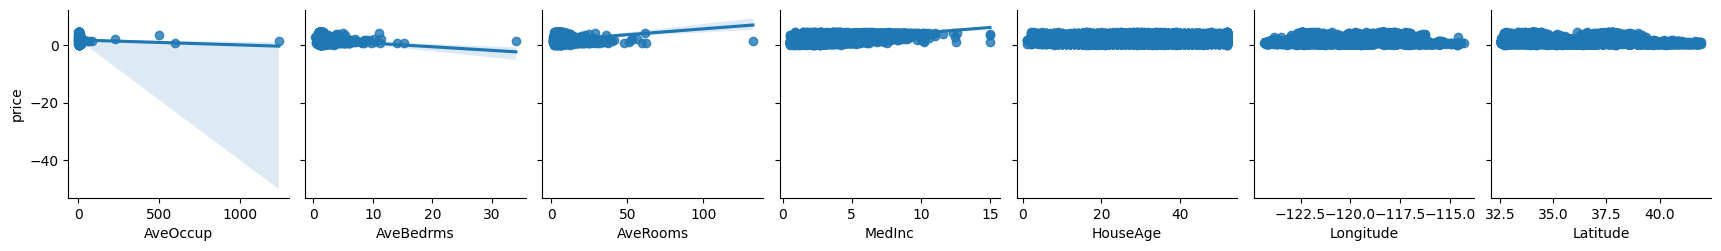

In [24]:
sns.pairplot(df,
    x_vars=['AveOccup','AveBedrms','AveRooms','MedInc','HouseAge','Longitude','Latitude'],
    y_vars='price',
    kind='reg')

## 0.8 Hyperparameter Tuning 

#### Using GridSearch 

In [112]:
## Our best model was lasso - we want to find the best hyperramanets 

## Specifying the dictionaries of parameters to test 
alphas = [0.001,0.01,0.5,1,10,100]
degrees = [1,2,3]
param_grid=dict(polynomialfeatures_degree=degrees,param_alpha=alphas)
param_grid

{'polynomialfeatures_degree': [1, 2, 3],
 'param_alpha': [0.001, 0.01, 0.5, 1, 10, 100]}

In [88]:
from sklearn.model_selection import GridSearchCV

In [118]:
## fit thos parameters 
model = Lasso()

reg_model = GridSearchCV(estimator=model,
             param_grid={'alpha':[1e-8,1e-10,1e-12,1e-20]},
             cv=4,
             scoring='r2')
reg_model.fit(x_train,y_train)
print(reg_model.best_score_,reg_model.best_params_)

0.4218212484859375 {'alpha': 1e-20}


Text(0.5, 0, 'alpha')

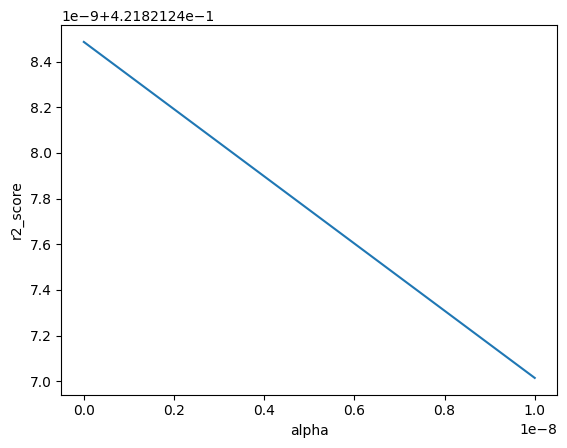

In [121]:
plt.plot(reg_model.cv_results_['param_alpha'].data,reg_model.cv_results_['mean_test_score'])
plt.ylabel('r2_score')
plt.xlabel('alpha')